# STOR 120: Take Home Midterm 2

60 points total

**Due:** Wednesday, March 30th to Gradescope before the start of class time.

    Section 001: 12:20pm
    Section 002:  1:25pm
  
**Directions:** The exam is open book, notes, course materials, internet, and all things that are not direct communication with others. Just as with all course assignments, you will submit exams to Gradescope as Jupyter Notebooks with the ipynb file extension. To receive full credit, you should show all of your code used to answer each question. Make sure to view your submission in Gradescope and verify that it is the correct file and has the format that you intended it to have, including all code being shown and run.

Come to office hours if you have specific questions regarding the exam. Due to the large class sizes, individual questions sent via email are not possible to answer for all students. Please refrain from posting public questions to Piazza before the exam is due.  

**Run the cell below to import the needed modules**

In [1]:
from datascience import *
import numpy as np
import pandas as pd
import random as rd
from collections import Counter
from random import choices

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. The Birthday Paradox *(20 points total)*

Suppose that you are at a party and there are exactly 23 people are in the room. What are the chances that at least 2 of the people share the same birthday (not considering the year)? Suprising to most, the probability is actually greater than 50%! This is refered to as the *Birthday Paradox*, although it's only a “paradox” because our brains can’t handle the compounding power of exponents. To investigate this "paradox", you are going to simulate it.

**Question 1.1.** Construct an array `days` with 365 elements, numbered 1 through 365. We'll use this as our possible birthdays (not considering leap years). Then write a function `My_Party` that takes in one argument, the size of the party `n`, simulates a party of size `n` with `n` randomly selected birthdays, and returns a value of `1` if at least two people at the party have the same birthday. If no one at the party has the same birthday, the function should return `0`. *(7 pts)*

In [2]:
days = np.arange(1,366, 1)
days_list = []

for x in np.arange(0, len(days),1): 
    days_list.append(days[x])
    
party_size = 23

party_people_birthdays = np.random.choice(days_list, size=party_size, replace = True)

party_people_birthdays

array([126, 165, 290, 139, 169,  24, 323, 116, 175, 319, 282, 351,  47,
       262,  37, 250, 297, 322, 123, 347,  42, 204, 182])

In [3]:
party_people_birthdays_list = []

# Make the array a list 
for y in np.arange(party_size):
    party_people_birthdays_list.append(party_people_birthdays[y])
    
party_people_birthdays_list

[126,
 165,
 290,
 139,
 169,
 24,
 323,
 116,
 175,
 319,
 282,
 351,
 47,
 262,
 37,
 250,
 297,
 322,
 123,
 347,
 42,
 204,
 182]

In [4]:
res = {}

for i in party_people_birthdays_list:
    res[i] = party_people_birthdays_list.count(i)
    
print(res)

{126: 1, 165: 1, 290: 1, 139: 1, 169: 1, 24: 1, 323: 1, 116: 1, 175: 1, 319: 1, 282: 1, 351: 1, 47: 1, 262: 1, 37: 1, 250: 1, 297: 1, 322: 1, 123: 1, 347: 1, 42: 1, 204: 1, 182: 1}


In [5]:
# If there is a key in this above dictionary that is equal to or greater than 2, then we want to add 1 to a counter 

count = 0 
for key in res:
    if res[key] >= 2: 
        count = 1
    else: 
        count = count + 0 
        
count

0

In [26]:
# Put it all together 
days = np.arange(1,366, 1)
days_list = []

for x in np.arange(0, len(days),1): 
    days_list.append(days[x])
    
def My_Party(party_size):
    party_people_birthdays = np.random.choice(days_list, size=party_size, replace = True)
    party_people_birthdays_list = []
    
    # Make the array a list 
    for y in np.arange(party_size):
        party_people_birthdays_list.append(party_people_birthdays[y])
    
    res = {}
    
    for i in party_people_birthdays_list:
        res[i] = party_people_birthdays_list.count(i)
    
    # print(res) 
    # Uncomment "print(res)" if you want to confirm things are working 
    
    count = 0 
    
    for key in res:
        if res[key] >= 2: 
            count = 1
        else: 
            count = count + 0 
    return(count)
    
# Do not delete or change the below line of code
My_Party(23)

0

**Question 1.2** Perform a simulation that simulates 10,000 parties of 23 people with randomly selected birthdays. In what proportion of these parties did at least two people have the same birthday? *(3 pts)*

In [32]:
simulation_data = []
simulations = 100000

for x in np.arange(simulations):
    simulation_data.append(My_Party(23))

proportion_yes_2_same_bdays = simulation_data.count(1)/simulations
proportion_yes_2_same_bdays

0.5043

**Question 1.3** Now let's see how we can calculate this mathematically for a smaller party size. Suppose that you are at a small get together with only 5 people. Calculate (using algebra and not a simulation) the probability of having a party of 5 people where at least two people have the same birthday. Assign this value (with algebra showing how you calculated this answer) to `Birthday_Paradox_for_5`. *(2 pts)*

In [38]:
# The question is asking for us to NOT use the function, but to calculate "by hand" how to find the: 
# probability of a party of 5 people where at least 2 people have the same birthday 

# Probability that no one has the same birthday, excluding leap years 
no_same_bday = (365/365) * (364/365) * (363/365) * (362/365) * (361/365)

# Probability at least 2 share bday 
at_least_2_bday = 1 - no_same_bday

In [39]:
Birthday_Paradox_for_5 = at_least_2_bday
Birthday_Paradox_for_5

0.02713557369979347

**Question 1.4** Reusing much of the code from question 1.2, write a function `Many_of_My_Parties` that performs a simulation that simulates 10,000 parties of size `n` people with randomly selected birthdays. The function should return the proportion of these parties where at least two people have the same birthday. *(4 pts)*

In [40]:
def Many_of_My_Parties(party_size): 
    simulation_data = []
    simulations = 100000

    for x in np.arange(simulations):
        simulation_data.append(My_Party(party_size))

    proportion_yes_2_same_bdays = simulation_data.count(1)/simulations
    return(proportion_yes_2_same_bdays)

# Do not delete or change the below line of code
Many_of_My_Parties(5)

0.02738

**Question 1.5** Construct a table `Birthday_Paradox_for_n` containing a column `Size of Party` for party sizes of 5, 10, 15, 20, 25, 30, 35, 40, and 45. A second column `At Least Two` should contain your simulated probabilities for parties of the `Size of the Party` having at least two people with the same birthday. *(4 pts)*

Note: This code may take a few more seconds to run than our typical simulations

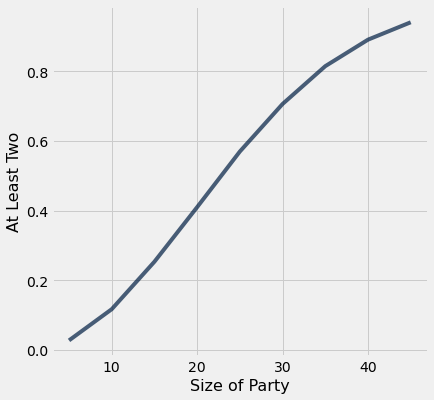

In [59]:
Birthday_Paradox_for_n = Table().with_columns("Size of Party", np.arange(5,46,5), 
                          "At Least Two", make_array(Many_of_My_Parties(5), Many_of_My_Parties(10), 
                                           Many_of_My_Parties(15), Many_of_My_Parties(20), 
                                           Many_of_My_Parties(25), Many_of_My_Parties(30),
                                           Many_of_My_Parties(35), Many_of_My_Parties(40),
                                           Many_of_My_Parties(45)))


# Birthday_Paradox_for_n
# The above thing shows the table, and it works

# Do not delete or change the below line of code
Birthday_Paradox_for_n.plot('Size of Party')

## 2. Which Justin? *(40 points total)*

The table `Which_Justin` contains a random sample of data collected from Instagram posts made by three famous Justins: Bieber, Trudeau, and Timberlake. Each row of the table is an Instagram post, with variables such as the number of likes, comments, hashtags, characters, words, emojis, and mentions. Run the cell below to load the dataset.

In [ ]:
Which_Justin_df = pd.read_csv('Which_Justin_120.csv')
Which_Justin_df["username"].unique()

**Question 2.1** How similar or different do we expect the attribues of the posts by these Justins to be? You may believe that the average number of emojis used in Instagram posts by Justin Beiber is greater than that of Justin Trudeau. Let's perform a hypothesis test to test this claim with our sample data. For this test, we should use the hypotheses below. *(12 pts)*

**Null Hypothesis:** The average number of emojis used in Justin Bieber's Instagram posts is equal to the average number of emojis used in Justin Trudeau's Instagram posts      
    
**Alternative Hypothesis**: The average number of emojis used in Justin Bieber's Instagram posts is greater than the average number of emojis used in Justin Trudeau's Instagram posts

Perform a hypotheses test to test the above hypotheses. **To receive full credit you should:**

1. Choose an appropriate test statistic

2. Find the value of the observed test statistic

3. Assume the null hypothesis is true and sample from the theoretical population under the null hypothesis and obtain the simulated test statistic. Repeat this 1000 times.

4. Plot your simulated test statistics in a histogram along with the observed test statistic

5. Calculate the p-value based off of your observed and simulated test statistics

6. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text!

## Notes
**What I want:**  We want to run a difference in means between the average number of emojis used inJB's IG posts vs JT's IG posts 

### A/B Testing Steps: 
1. Define a null and alternate model 

**Null Hypothesis:** The average number of emojis used in Justin Bieber's Instagram posts is equal to the average number of emojis used in Justin Trudeau's Instagram posts      
    
**Alternative Hypothesis**: The average number of emojis used in Justin Bieber's Instagram posts is greater than the average number of emojis used in Justin Trudeau's Instagram posts

2. Choose a test statistic (typically the difference in means between two categories)

**What I want:**  We want to run a difference in means between the average number of emojis used inJB's IG posts vs JT's IG posts 

**Compare** 

    - (A): n_emojies in JB IG Posts
    
    - (B): n_emojies in JT IG Posts

Is the difference due to chance alone? We are assuming there is no difference and we want to test if there is a difference. 

In [ ]:
# Define a new smaller table:
JB_JT_df = Which_Justin_df[(Which_Justin_df["username"] == "justinbieber") | (Which_Justin_df["username"] == "justinpjtrudeau")]
smaller = JB_JT_df[["username", "n_emojis"]]
smaller_groups = smaller.groupby("username").mean()
smaller_groups

In [ ]:
# # Histogram of the overlay; emoji use for JB vs the emoji use for JT 
# smaller_groups.hist(by = "username")

In [ ]:
# # 2. Choose a test statistic (typically the difference in means between two categories
# # Group(A) Average - Group(B) Average 
# # JB = A 
# # JT = B 
# # Negative values will tell me there is more evidence to support the null hypothesis 
# # Positive values will support the alternative hypothesis 

means_table = smaller_groups
print(means_table)
observed_difference = means_table["n_emojis"][0] - means_table["n_emojis"][1]
observed_difference

In [ ]:
# 1. Choose a test statistic (typically the difference in means between two categories)

## **What I want:**  We want to run a difference in means between the average number of emojis used inJB's IG posts vs JT's IG posts 

Which_Justin = Table.read_table('Which_Justin_120.csv')

def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

difference_of_means(Which_Justin, "n_emojis", "username")

In [ ]:
# 3. Shuffle the labels of the original sample, find your simulated test statistic, and repeat many times
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')  

one_simulated_difference(Which_Justin, "n_emojis", "username")

differences = make_array()

for i in np.arange(1000):
    new_difference = one_simulated_difference(Which_Justin, "n_emojis", "username")
    differences = np.append(differences, new_difference)

# # 4. Find the value of the observed test statistic 
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)

plt.title('Prediction Under the Null Hypothesis');
plt.plot([observed_difference, observed_difference], [0, .5], color='red', lw=2);

# 5. Calculate the p-value based off your observed and simulated test statistics 
sum(differences <= observed_difference)/5000

### 6. Use the p-value and p-value cutoff to draw a conclusion about the null hypothesis
Based on the histogram, our observed value appears close to the center of the spread of the histogram. What we got here appears to be what we would expect to see by chance.  With a P-Value of 0.072 that is greater than a default alpha level of 0.05, which means we fail to reject the null hypothesis.  We have evidence to support that the average number of emojis used in JB's IG posts is equal to the average number of emokis used in JT's IG posts. 

**Question 2.2.1** Construct a new table `Justin_Timberlake` containing only the 200 Instagram posted made by Justin Timberlake in the `Which_Justin` table. The `Justin_Timberlake` table should have an additional column `hashtags`. The `n_hashtags` column is already contained in the table, counting the number of hashtags in each Instagram post. The new column `hashtags` should be equal to `1` if the post has at least 1 hashtag and equal to 0 if the post has no hashtags. *(4 pts)*

In [ ]:
Justin_Timberlake = Which_Justin_df[Which_Justin_df["username"] == "justintimberlake"]
Justin_Timberlake["hashtags"] = [1 if x >= 1 else 0 for x in Justin_Timberlake["n_hashtags"]]

In [ ]:
JT_1_hashtag = Justin_Timberlake[Justin_Timberlake["hashtags"] == 1]
JT_0_hashtag = Justin_Timberlake[Justin_Timberlake["hashtags"] == 0]

JT_0_hashtag

**Question 2.2.2** Construct a 95% confidence interval to predict the average number of likes on Justin Timberlake's Instagram posts that contain at least one hashtag. *(6 pts)*

**To receive full credit you should:**

1. Take bootstrap samples from the original sample, compute the average number of likes, and repeat at least 1000 times

2. Determine the upper and lower bounds of the 95% confidence interval

3. Assign the bounds of the confidence interval to: lower_bound_222, upper_bound_222

You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text! You do **not** need to plot a histogram of the bootstrap statistics with the confidence interval.

In [ ]:
JT_table_1_hashtags = Table.from_df(JT_1_hashtag, keep_index=False)
#1. Take bootstrap samples from the original sample, compute the average number of likes, and repeat at least 1000 times
our_sample = JT_table_1_hashtags.sample(100, with_replacement=False)
our_sample_like_average = np.mean(our_sample.column('n_likes'))

def one_bootstrap_mean():
    single_sample = our_sample.sample()
    return np.mean(single_sample.column('n_likes'))

one_bootstrap_mean()

bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)

In [ ]:
lower_bound_222 = percentile(2.5, bootstrap_means)
upper_bound_222 = percentile(97.5, bootstrap_means)

lower_bound_222, upper_bound_222

**Question 2.2.3** Construct a 95% confidence interval to predict the average number of likes on Justin Timberlake's Instagram posts that contain **zero** hashtags. *(6 pts)*

**To receive full credit you should:**

1. Take bootstrap samples from the original sample, compute the average number of likes, and repeat at least 1000 times

2. Determine the upper and lower bounds of the 95% confidence interval

3. Assign the bounds of the confidence interval to: lower_bound_223, upper_bound_223

You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text! You do **not** need to plot a histogram of the bootstrap statistics with the confidence interval.

In [ ]:
JT_table_0_hashtags = Table.from_df(JT_0_hashtag, keep_index=False)
#1. Take bootstrap samples from the original sample, compute the average number of likes, and repeat at least 1000 times
our_sample = JT_table_0_hashtags.sample(70, with_replacement=False)
our_sample_like_average = np.mean(our_sample.column('n_likes'))

def one_bootstrap_mean():
    single_sample = our_sample.sample()
    return np.mean(single_sample.column('n_likes'))

one_bootstrap_mean()

bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)

In [ ]:
lower_bound_223 = percentile(2.5, bootstrap_means)
upper_bound_223 = percentile(97.5, bootstrap_means)

lower_bound_223, upper_bound_223

**Question 2.2.4** Do you have evidence to say that the average number of likes on Justin Timberlake's Instagram posts is different between posts with at least one hashtag versus the posts without a hashtag? Why or why not? Use your confidence intervals in the previous two questions to justify your answer. *(2 pts)*

No, we do not have evidence ot say that the average number of likes on Justin Timberlake's IG posts are different between posts with at least one hashtag vs posts without a hashtag because the 95% confidence interval contains overlapping values and if the true population value falls in that overlapping value set, then there would be no difference between posts with at least one hashtag vs posts without a hashtag.  If the confidence intervals did not overlap, we would have evidence that there could be a difference between the groups. 

**Question 2.3** A recent study analyzing Instagram posts during the first quarter of 2021 found that 16.6% of all Instagram posts contained a video. For the `Which_Justin` table containing posts from all three Justins, is there evidence to suggest that these Justins post videos a different proportion of the time compared to other Instagram users (posting videos 16.6% of the time)? *(10 pts)*

Perform a hypotheses test to test the above claim. **To receive full credit you should:**

1. Choose and cite appropriate null and alternative hypotheses

2. Choose an appropriate test statistic

3. Find the value of the observed test statistic

4. Assume the null hypothesis is true and sample from the theoretical population under the null hypothesis and obtain the simulated test statistic. Repeat this 1000 times.

5. Plot your simulated test statistics in a histogram along with the observed test statistic

6. Calculate the p-value based off of your observed and simulated test statistics

7. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text!

In [ ]:
smaller_JT = Which_Justin_df[["username", "is_video"]]
proportions_smaller = smaller_JT.groupby("username").sum()/137
proportions_smaller

In [ ]:
## JUSTIN BIEBER 

# 1. Choose and cite appropriate null and alternative hypotheses

# Null Hypothesis: The proportion of videos posted by Justin Bieber on his IG is equal to the proportion of all IG posts containing videos 
# Alternative Hypothesis: The proportion of  videos posted by Justin Bieber on his IG is not equal 

model_proportions = make_array(proportions_smaller["is_video"][0], .166)

# 2. Choose an appropriate test statistic
# We want a test for proportions 

def statistic(expected_prop, actual_prop):
    return 100*abs(expected_prop - actual_prop)

# 3. Find the value of the observed test statistic
observed_statistic = statistic(0.5, 18/24)

# 4. Assume the null hypothesis is true and sample from the theoretical population under the null hypothesis and obtain the simulated test statistic. Repeat this 1000 times.
num_simulations = 1000

def simulation_and_statistic(model_proportions, expected_proportion_correct):
       
    simulation_proportion_correct = sample_proportions(24, model_proportions)
    one_statistic = statistic(simulation_proportion_correct.item(0), expected_proportion_correct)
    
    return one_statistic

simulated_statistics = make_array()

for i in np.arange(num_simulations):
    simulated_statistic = simulation_and_statistic(model_proportions, 0.5)
    simulated_statistics = np.append(simulated_statistics, simulated_statistic)


# 5. Plot your simulated test statistics in a histogram along with the observed test statistic
Table().with_column('Simulated Statistics', simulated_statistics).hist(bins = np.arange(0, 50, 4.16))
plt.plot([observed_statistic, observed_statistic], [0, .08], color='red', lw=2);

# 6. Calculate the p-value based off of your observed and simulated test statistics
print("p-value:  ", sum(simulated_statistics >= observed_statistic)/num_simulations)


## 7. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

Based on the histogram, our observed value appeares close to the center of the spread of the histrogram.  What we got here appears to be what we would expect to see by chance.  With a p-value of 0.626 that is greater than the default alpha level of 0.05, this means we fail to reject the null hypothesis.  We have evidence to support that the proportion of videos posted by Justin Bieber on his IG is equal to the proportion of all IG posts containing videos.

In [ ]:
## JUSTIN CANADA 

# 1. Choose and cite appropriate null and alternative hypotheses

# Null Hypothesis: The proportion of videos posted by JUSTIN CANADA  on his IG is equal to the proportion of all IG posts containing videos 
# Alternative Hypothesis: The proportion of  videos posted by JUSTIN CANADA  on his IG is not equal 

model_proportions = make_array(proportions_smaller["is_video"][1], .166)

# 2. Choose an appropriate test statistic
# We want a test for proportions 

def statistic(expected_prop, actual_prop):
    return 100*abs(expected_prop - actual_prop)

# 3. Find the value of the observed test statistic
observed_statistic = statistic(0.5, 18/24)

# 4. Assume the null hypothesis is true and sample from the theoretical population under the null hypothesis and obtain the simulated test statistic. Repeat this 1000 times.
num_simulations = 1000

def simulation_and_statistic(model_proportions, expected_proportion_correct):
       
    simulation_proportion_correct = sample_proportions(24, model_proportions)
    one_statistic = statistic(simulation_proportion_correct.item(0), expected_proportion_correct)
    
    return one_statistic

simulated_statistics = make_array()

for i in np.arange(num_simulations):
    simulated_statistic = simulation_and_statistic(model_proportions, 0.5)
    simulated_statistics = np.append(simulated_statistics, simulated_statistic)


# 5. Plot your simulated test statistics in a histogram along with the observed test statistic
Table().with_column('Simulated Statistics', simulated_statistics).hist(bins = np.arange(0, 50, 4.16))
plt.plot([observed_statistic, observed_statistic], [0, .08], color='red', lw=2);

# 6. Calculate the p-value based off of your observed and simulated test statistics
print("p-value:  ", sum(simulated_statistics >= observed_statistic)/num_simulations)


## 7. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

Based on the histogram, our observed value appeares close to the center of the spread of the histrogram.  What we got here appears to be what we would expect to see by chance.  With a p-value of 0.827 that is greater than the default alpha level of 0.05, this means we fail to reject the null hypothesis.  We have evidence to support that the proportion of videos posted by JUSTIN CANADA  on his IG is equal to the proportion of all IG posts containing videos. 

In [ ]:
## JUSTIN TIMBERLAKE 

# 1. Choose and cite appropriate null and alternative hypotheses

# Null Hypothesis: The proportion of videos posted by JUSTIN TIMBERLAKE  on his IG is equal to the proportion of all IG posts containing videos 
# Alternative Hypothesis: The proportion of  videos posted by JUSTIN TIMBERLAKE  on his IG is not equal 

model_proportions = make_array(proportions_smaller["is_video"][2], .166)

# 2. Choose an appropriate test statistic
# We want a test for proportions 

def statistic(expected_prop, actual_prop):
    return 100*abs(expected_prop - actual_prop)

# 3. Find the value of the observed test statistic
observed_statistic = statistic(0.5, 18/24)

# 4. Assume the null hypothesis is true and sample from the theoretical population under the null hypothesis and obtain the simulated test statistic. Repeat this 1000 times.
num_simulations = 1000

def simulation_and_statistic(model_proportions, expected_proportion_correct):
       
    simulation_proportion_correct = sample_proportions(24, model_proportions)
    one_statistic = statistic(simulation_proportion_correct.item(0), expected_proportion_correct)
    
    return one_statistic

simulated_statistics = make_array()

for i in np.arange(num_simulations):
    simulated_statistic = simulation_and_statistic(model_proportions, 0.5)
    simulated_statistics = np.append(simulated_statistics, simulated_statistic)


# 5. Plot your simulated test statistics in a histogram along with the observed test statistic
Table().with_column('Simulated Statistics', simulated_statistics).hist(bins = np.arange(0, 50, 4.16))
plt.plot([observed_statistic, observed_statistic], [0, .08], color='red', lw=2);

# 6. Calculate the p-value based off of your observed and simulated test statistics
print("p-value:  ", sum(simulated_statistics >= observed_statistic)/num_simulations)


## 7. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

Based on the histogram, our observed value appeares close to the center of the spread of the histrogram.  What we got here appears to be what we would expect to see by chance.  With a p-value of 0.053 that is only slightly greater than the default alpha level of 0.05, this means we fail to reject the null hypothesis.  The proportion of videos posted by JUSTIN TIMBERLAKE  on his IG is equal to the proportion of all IG posts containing videos.

Despite barely reaching the cut off for a 0.05 alpha level, I would feel more comfortable running this again a different alpha level to see if we get the same result.  This barely meets the requirements to fail to reject the null hypothesis.